In [2]:
%run "../Almgren-Chriss-Market.ipynb"
%run "RL-Agent.ipynb"
%run "RL-Environment.ipynb"

## Traning the RL-Agent

This file will specifically apply Q-learning to this custom market trading environment. The number of games training are 15000, and there other further 100 games of testings policy for every 1000 games training interval.

This code is greatly influenced by [this application](https://github.com/andri27-ts/Reinforcement-Learning/blob/master/Week2/frozenlake_Qlearning.ipynb) of Q-learning on [Open AI's Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0/).

**Test games**

In [3]:
def test_game(trader, environment):
    reward_games = []
    for _ in range(100):
        obs = environment.reset()
        rewards = 0
        while True:
            next_obs, reward, done = environment.step(trader.select_greedy_action(obs))
            obs = next_obs
            rewards += reward
            
            if done:
                reward_games.append(rewards)
                break
    return np.mean(reward_games)

**Define the constant rate of epsilon decay and the total of training game**

In [4]:
EPS_DECAY_RATE = 0.9993
MAX_GAMES = 15000

**Initialize trader and environment**

In [5]:
qt = QTrader(X, cash)
env = Environment(qt, S_cos)

**Traning the trader**

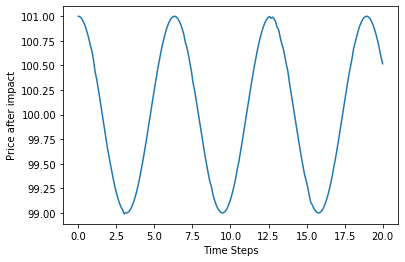

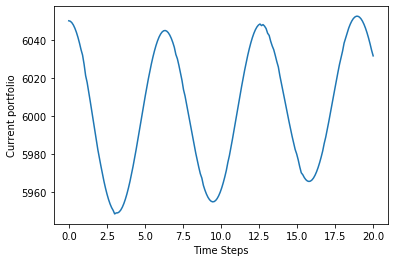

50  and  1000.0
Games:  0 Test reward:  13.625363897195184


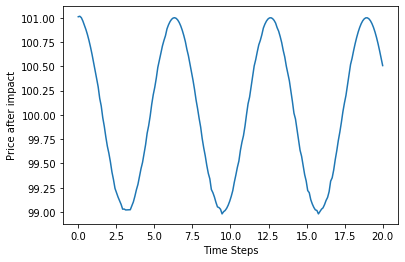

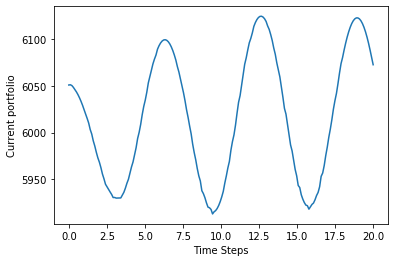

51.0  and  899.5028142051287
Games:  1000 Test reward:  -11.71920079434547


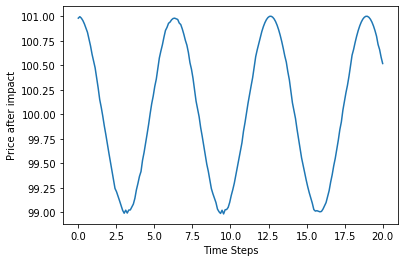

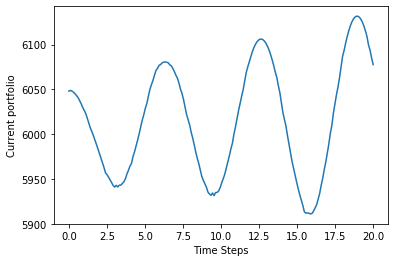

48.0  and  1200.9943715897425
Games:  2000 Test reward:  12.939126495524889


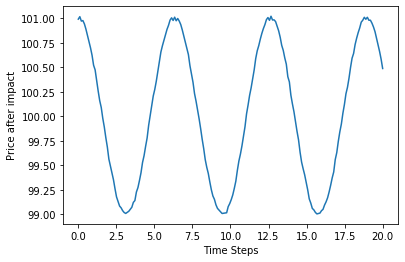

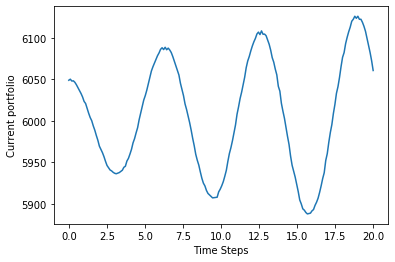

49.0  and  1100.4971857948713
Games:  3000 Test reward:  83.00325448808177


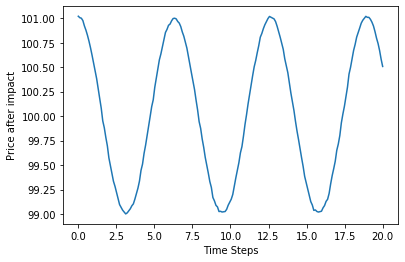

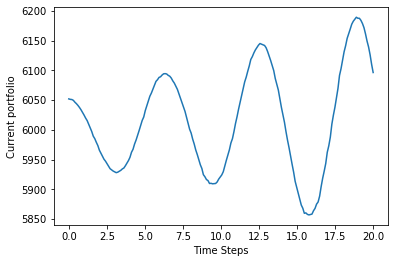

52.0  and  799.0056284102576
Games:  4000 Test reward:  77.13505717900817


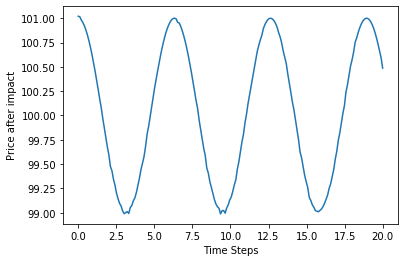

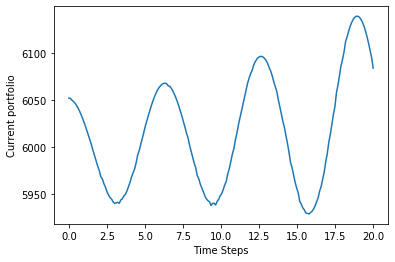

52.0  and  799.0056284102576
Games:  5000 Test reward:  89.97478791009839


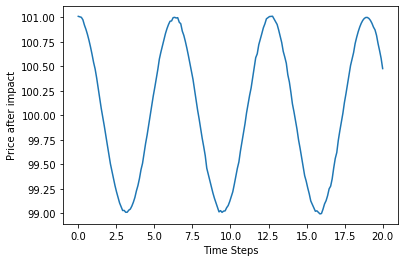

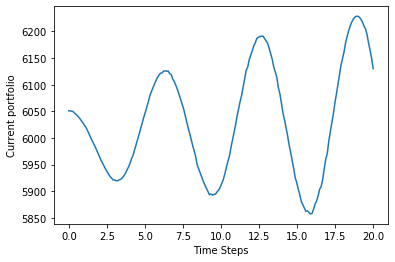

51.0  and  899.5028142051287
Games:  6000 Test reward:  77.56501594319637


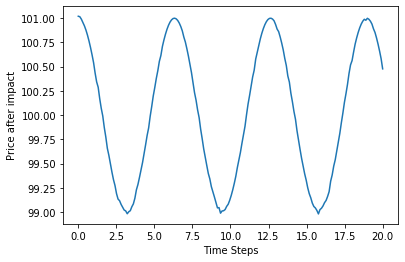

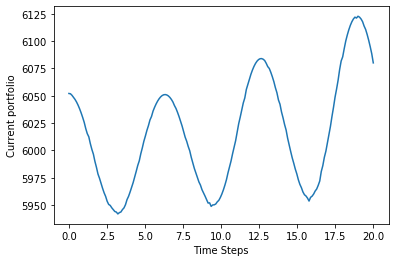

52.0  and  799.0056284102576
Games:  7000 Test reward:  59.939428053264365


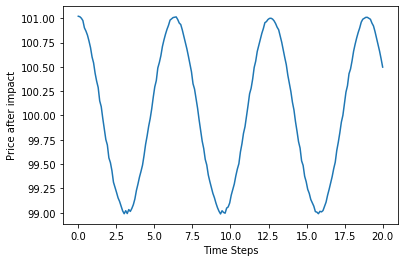

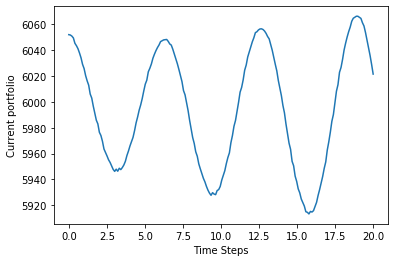

52.0  and  799.0056284102576
Games:  8000 Test reward:  6.790753518521569


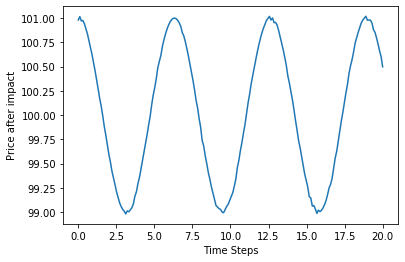

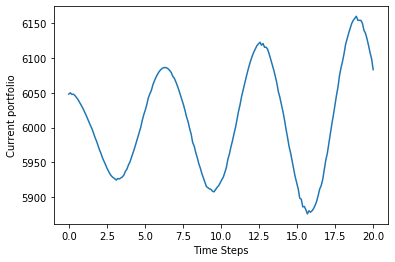

48.0  and  1200.9943715897425
Games:  9000 Test reward:  43.43810479093349


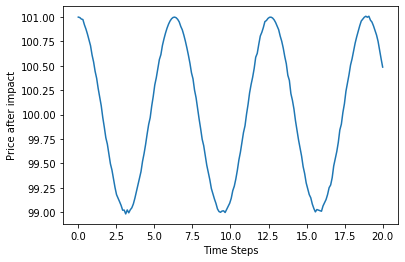

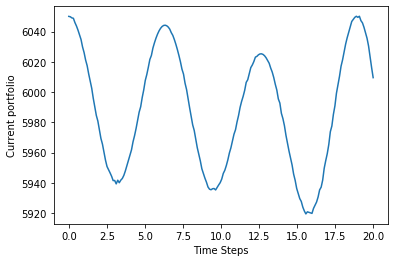

50  and  1000.0
Games:  10000 Test reward:  44.602199575917965


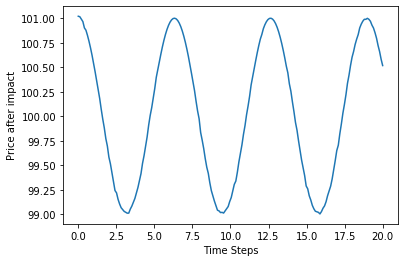

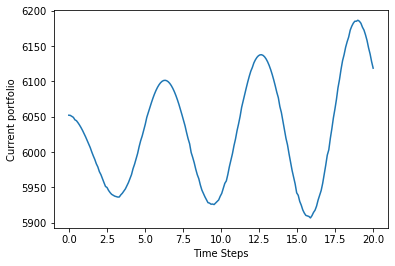

52.0  and  799.0056284102576
Games:  11000 Test reward:  104.84096699616532


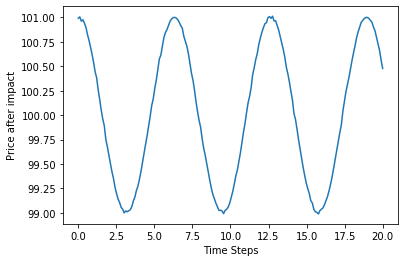

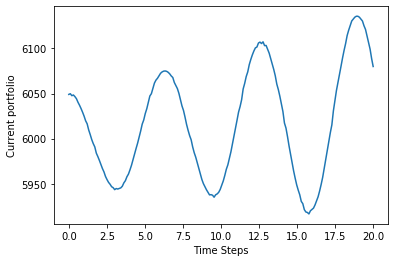

49.0  and  1100.4971857948713
Games:  12000 Test reward:  86.65325556223182


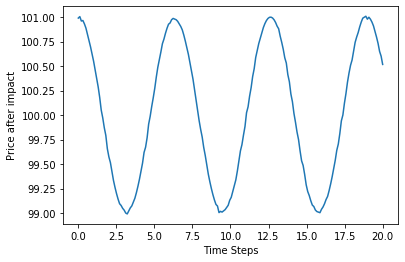

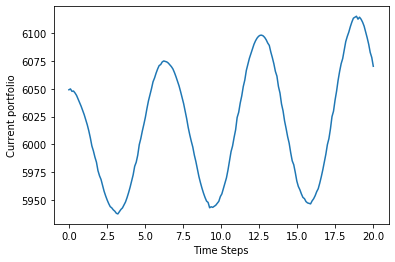

49.0  and  1100.4971857948713
Games:  13000 Test reward:  49.27866513017736


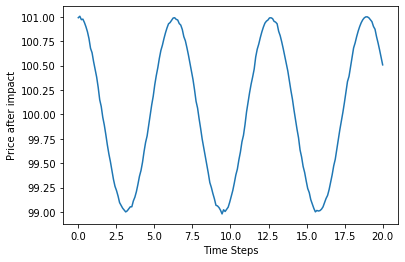

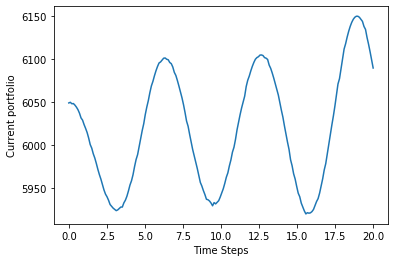

49.0  and  1100.4971857948713
Games:  14000 Test reward:  114.73160263453333


In [6]:
obs = env.reset()
games_count = 0
# reward_count = 0
test_reward_list = []

while games_count < MAX_GAMES:
    action = qt.select_eps_greedy_action(obs)
    next_obs, reward, done = env.step(action)
    qt.q_learning(obs, next_obs, reward, action)
    obs = next_obs
    if done:
        qt.update_epsilon(EPS_DECAY_RATE)
        if games_count % 1000 == 0:
            env.plot_price()
            env.plot_value()            
            print(qt.get_stock()[0], " and ", qt.get_cash()[0])
            test_reward = test_game(qt, env)
            print('Games: ', games_count, 'Test reward: ', test_reward)
            test_reward_list.append(test_reward)
        obs = env.reset()
        games_count += 1

**Plotting the rewards for each testing episodes**

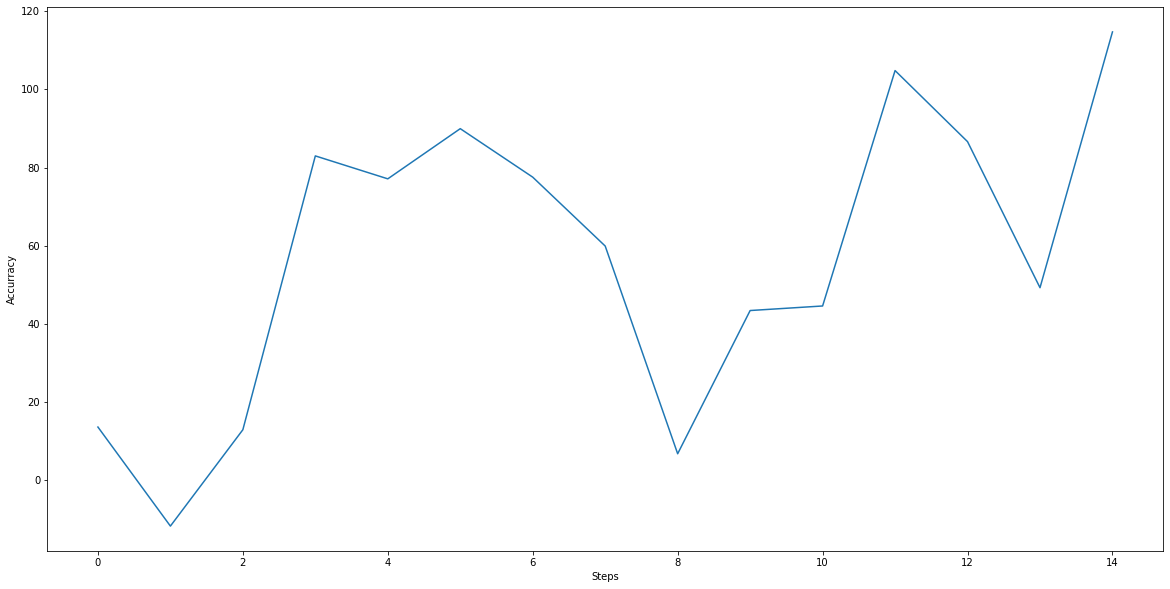

In [7]:
plt.figure(figsize=(20,10))
plt.xlabel('Steps')
plt.ylabel('Accurracy')
plt.plot(test_reward_list)
plt.show()

#### The result of the training is not always increased, due to the fact that the state spaces are only a discretion of the current price, without taking the trend into context. Nevertheless, this can be a fundamental ground for further development.